Comprobación básica del ejemplo del código descargado de 
[MStamp](https://github.com/mcyeh/mstamp/tree/master)

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
from mstamp_stomp import mstamp as mstamp_stomp
from mstamp_stamp import mstamp as mstamp_stamp

In [2]:
def plot_motifs(matrix_profile, dimensionality=1):
    motif_at = matrix_profile[dimensionality - 1, :].argsort()[:2]

    plt.figure(figsize=(14, 7))
    for i in range(3):
        plt.subplot(4, 1, i + 1)
        plt.plot(data.T[i, :])
        plt.title('$T_{}$'.format(i + 1))
        for m in motif_at:
            plt.plot(range(m, m + sub_len), data.T[i, :][m:m + sub_len], c='r')
        plt.xlim((0, matrix_profile.shape[1]))

    plt.subplot(414)
    plt.title('{}-dimensional Matrix Profile'.format(dimensionality))
    plt.plot(matrix_profile[dimensionality - 1, :])
    for m in motif_at:
        plt.axvline(m, c='r')
    plt.xlim((0, matrix_profile.shape[1]))
    plt.tight_layout()

Progress [##################################################] 100.0%      0.0 sec

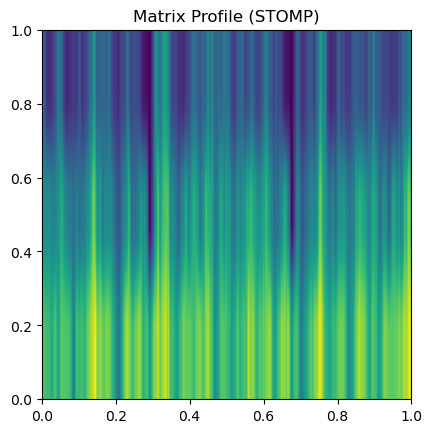

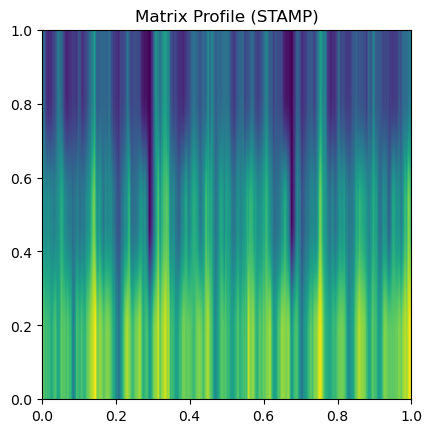

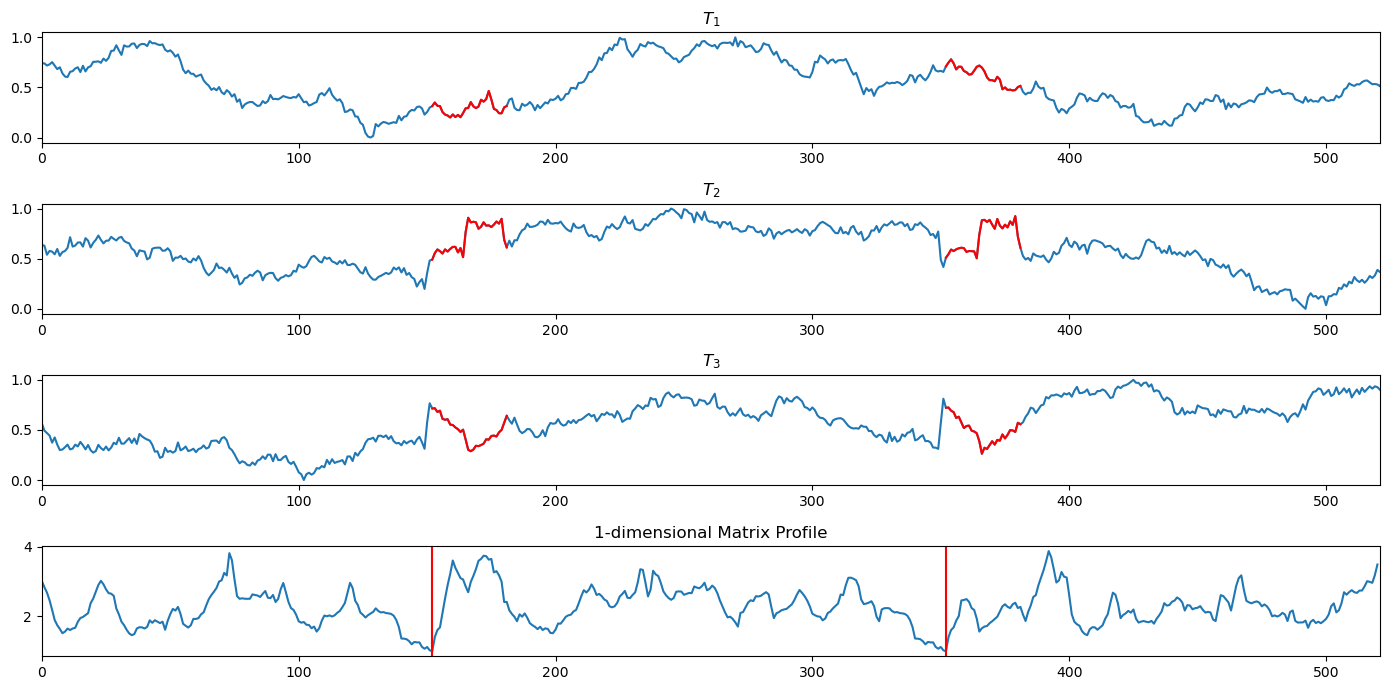

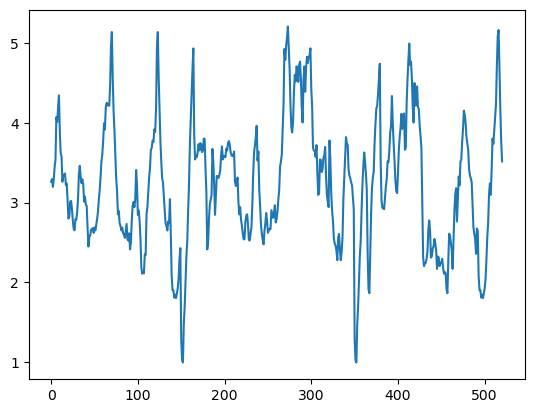

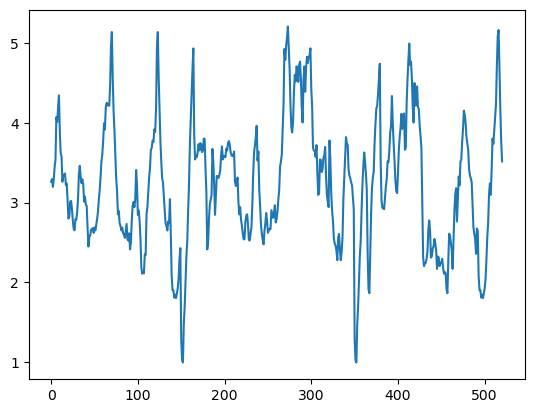

In [3]:
mat = sio.loadmat('toy_data.mat')
data = mat['data']
sub_len = mat['sub_len'][0][0]

# using the stomp based method to compute the multidimensional matrix
# profile
mat_pro_1, pro_idx_1 = mstamp_stomp(
    data.T, sub_len,
    return_dimension=False
)

# plot the matrix profile as image
plt.figure()
plt.title('Matrix Profile (STOMP)')
plt.imshow(mat_pro_1, extent=[0, 1, 0, 1])

# using the stamp based method to compute the multidimensional matrix
# profile
mat_pro_2, pro_idx_2 = mstamp_stamp(
    data.T, sub_len,
    return_dimension=False
)

# plot the matrix profile as image
plt.figure()
plt.title('Matrix Profile (STAMP)')
plt.imshow(mat_pro_2, extent=[0, 1, 0, 1])

plot_motifs(mat_pro_2)

# the function can also be used to compute the 1D matrix profile
mat_pro_3, _ = mstamp_stomp(
    data[:, 1].T, sub_len,
    return_dimension=False
)
plt.figure()
plt.plot(mat_pro_3[0, :])

mat_pro_4, _ = mstamp_stamp(
    data[:, 1].T, sub_len,
    return_dimension=False
)
plt.figure()
plt.plot(mat_pro_4[0, :])

plt.show()